# Divisive Divisive Clustering
Divisive clustering, also known as top-down clustering, is a Divisive clustering method that starts with all points in a single cluster and recursively splits the clusters until each point is its own cluster or until specific criteria are met.

## Use Cases
- Market segmentation
- Social network analysis
- Genomics
- Document organization

## Advantages
- Can be more efficient than agglomerative clustering for certain data structures
- Can result in more balanced clusters
- Suitable for large datasets if an efficient splitting method is used

## Disadvantages
- Requires a stopping criterion for splitting
- May not perform well if the initial cluster is not representative
- Implementations are less common and may require custom coding

# Import libraries

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import unittest

In [34]:
class DivisiveDivisiveClustering:
    def __init__(self, n_clusters=2):
        self.n_clusters = n_clusters
        self.cluster_labels_ = None

    def fit(self, X):
        # Create initial cluster
        clusters = [X]
        while len(clusters) < self.n_clusters:
            # Find the largest cluster
            largest_cluster = max(clusters, key=lambda c: len(c))
            clusters.remove(largest_cluster)
            
            # Perform Divisive clustering
            Z = linkage(largest_cluster, method='ward')
            # Split into two clusters
            split_labels = fcluster(Z, 2, criterion='maxclust')
            
            # Create new clusters
            new_clusters = [largest_cluster[split_labels == 1], largest_cluster[split_labels == 2]]
            clusters.extend(new_clusters)
        
        # Assign final cluster labels
        self.cluster_labels_ = np.zeros(X.shape[0], dtype=int)
        for idx, cluster in enumerate(clusters):
            self.cluster_labels_[np.isin(X, cluster).any(axis=1)] = idx

    def predict(self, X):
        return self.cluster_labels_




# plot dendrogram

In [35]:
def plot_dendrogram(dataset, dataset_name):
    # Compute the linkage matrix
    Z = linkage(dataset, 'ward')
    # Plot the dendrogram
    plt.figure(figsize=(10, 5))
    plt.title(f"Dendrogram for {dataset_name}")
    dendrogram(Z)
    plt.show()


# Divisive_clustering_and_plot

In [36]:
def Divisive_clustering_and_plot(dataset, dataset_name, n_clusters=4):
    # Apply Agglomerative Divisive Clustering
    clustering = DivisiveDivisiveClustering(n_clusters=n_clusters)
    clustering.fit(dataset)

    # Plot results
    plt.scatter(clustering[:, 0], clustering[:, 1], c=clustering.predict(dataset), cmap='viridis')
    plt.title('Divisive Divisive Clustering Results')
    plt.show()



# Using make_blobs

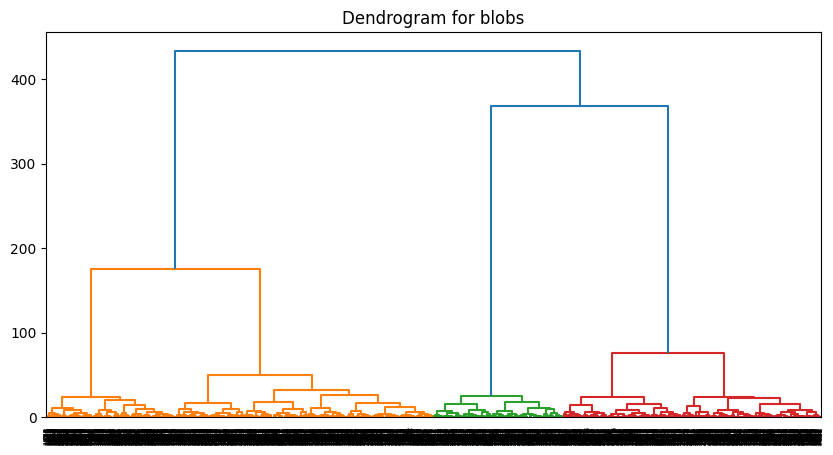

In [37]:
data_blobs, _ = make_blobs(n_samples=3000, centers=6, cluster_std=1, random_state=42)
plot_dendrogram(data_blobs,'blobs')

In [38]:
labels_blobs = Divisive_clustering_and_plot(data_blobs, 'Blobs', 4)

TypeError: 'DivisiveDivisiveClustering' object is not subscriptable

# Using make_moons

In [ ]:
data_moons, _ = make_moons(n_samples=1000, noise=0.1, random_state=42)
plot_dendrogram(data_moons,'moons')

In [ ]:
labels_blobs = Divisive_clustering_and_plot(data_moons, 'moons', 4)

# Using make_circles

In [ ]:
data_circles, _ = make_circles(n_samples=1000, factor=0.5, noise=0.05, random_state=42)
plot_dendrogram(data_circles,'circles')

In [ ]:
labels_blobs = Divisive_clustering_and_plot(data_circles, 'circles', 4)